In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(palette='pastel')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

In [2]:
df_torax = pd.read_csv("../data/processed/df_procesada_112103.csv", sep=";")
df_torax["DIAGNOSTICO1"] = df_torax["DIAGNOSTICO1"].str.replace(".", "", regex=False)

/var/folders/wy/2slj_t7s2vz19v2h2926qb340000gn/T/ipykernel_96167/977106801.py:1: DtypeWarning: Columns (85,86,88,90,129) have mixed types. Specify dtype option on import or set low_memory=False.
  df_torax = pd.read_csv("../data/processed/df_procesada_112103.csv", sep=";")


In [3]:
DIAGS_CONGENITAS = [
    "Q201",
    "Q202",
    "Q203",
    "Q204",
    "Q205",
    "Q206",
    "Q208",
    "Q209",
    "Q210",
    "Q211",
    "Q212",
    "Q213",
    "Q214",
    "Q218",
    "Q220",
    "Q221",
    "Q222",
    "Q223",
    "Q224",
    "Q225",
    "Q228",
    "Q230",
    "Q231",
    "Q233",
    "Q240",
    "Q241",
    "Q244",
    "Q245",
    "Q246",
    "Q248",
    "Q249",
    "Q250",
    "Q251",
    "Q253",
    "Q254",
    "Q255",
    "Q256",
    "Q257",
    "Q258",
    "Q259",
    "Q264",
    "Q268",
    "Q272",
    "Q273",
    "Q288",
    "Q289",
    "Q311",
    "Q320",
    "Q321",
    "Q330",
    "Q331",
    "Q332",
    "Q334",
    "Q338",
    "Q341",
    "Q348",
    "Q678",
    "Q765",
    "Q766",
    "Q767",
    "Q768",
    "Q769",
    "Q780",
    "Q790",
    "Q798",
    "Q839",
    "Q850",
    "Q858",
    "Q859",
    "Q874",
    "Q893",
]

# Reemplaza diagnosticos de congenitas
df_torax["DIAGNOSTICO1"] = df_torax["DIAGNOSTICO1"].replace(DIAGS_CONGENITAS, "QXXX")

In [4]:
df_congenita = df_torax.query("DIAGNOSTICO1 == 'QXXX'")

<Axes: xlabel='ANIO_EGRESO'>

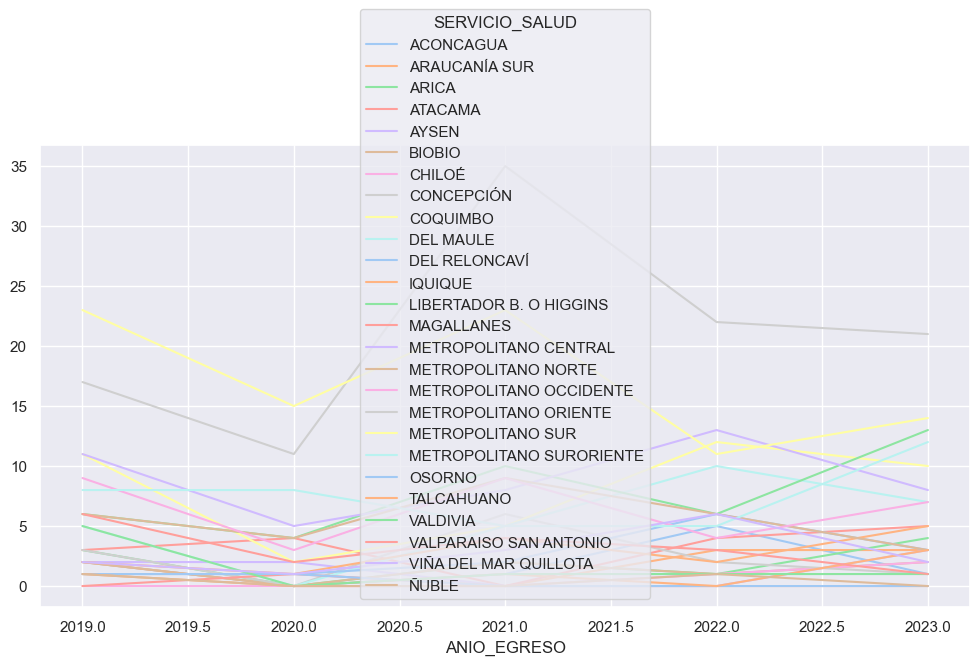

In [5]:
df_congenita.groupby(["ANIO_EGRESO", "SERVICIO_SALUD"]).size().unstack(fill_value=0).plot()

In [6]:
df_congenita

,COD_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,ETNIA,PROVINCIA,COMUNA,NACIONALIDAD,PREVISION,SERVICIO_SALUD,TIPO_PROCEDENCIA,TIPO_INGRESO,ESPECIALIDAD_MEDICA,TIPO_ACTIVIDAD,FECHA_INGRESO,SERVICIOINGRESO,FECHATRASLADO1,SERVICIOTRASLADO1,FECHATRASLADO2,SERVICIOTRASLADO2,FECHATRASLADO3,SERVICIOTRASLADO3,FECHATRASLADO4,SERVICIOTRASLADO4,FECHATRASLADO5,SERVICIOTRASLADO5,FECHATRASLADO6,SERVICIOTRASLADO6,FECHATRASLADO7,SERVICIOTRASLADO7,FECHATRASLADO8,SERVICIOTRASLADO8,FECHATRASLADO9,SERVICIOTRASLADO9,FECHAALTA,SERVICIOALTA,TIPOALTA,CONDICIONDEALTANEONATO1,PESORN1,SEXORN1,RN1ESTADO,CONDICIONDEALTANEONATO2,PESORN2,SEXORN2,RN2ESTADO,CONDICIONDEALTANEONATO3,PESORN3,SEXORN3,RN3ESTADO,CONDICIONDEALTANEONATO4,PESORN4,SEXORN4,RN4ESTADO,DIAGNOSTICO1,DIAGNOSTICO2,DIAGNOSTICO3,DIAGNOSTICO4,DIAGNOSTICO5,DIAGNOSTICO6,DIAGNOSTICO7,DIAGNOSTICO8,DIAGNOSTICO9,DIAGNOSTICO10,DIAGNOSTICO11,DIAGNOSTICO12,DIAGNOSTICO13,DIAGNOSTICO14,DIAGNOSTICO15,DIAGNOSTICO16,DIAGNOSTICO17,DIAGNOSTICO18,DIAGNOSTICO19,DIAGNOSTICO20,DIAGNOSTICO21,DIAGNOSTICO22,DIAGNOSTICO23,DIAGNOSTICO24,DIAGNOSTICO25,DIAGNOSTICO26,DIAGNOSTICO27,DIAGNOSTICO28,DIAGNOSTICO29,DIAGNOSTICO30,DIAGNOSTICO31,DIAGNOSTICO32,DIAGNOSTICO33,DIAGNOSTICO34,DIAGNOSTICO35,PROCEDIMIENTO1,PROCEDIMIENTO2,PROCEDIMIENTO3,PROCEDIMIENTO4,PROCEDIMIENTO5,PROCEDIMIENTO6,PROCEDIMIENTO7,PROCEDIMIENTO8,PROCEDIMIENTO9,PROCEDIMIENTO10,PROCEDIMIENTO11,PROCEDIMIENTO12,PROCEDIMIENTO13,PROCEDIMIENTO14,PROCEDIMIENTO15,PROCEDIMIENTO16,PROCEDIMIENTO17,PROCEDIMIENTO18,PROCEDIMIENTO19,PROCEDIMIENTO20,PROCEDIMIENTO21,PROCEDIMIENTO22,PROCEDIMIENTO23,PROCEDIMIENTO24,PROCEDIMIENTO25,PROCEDIMIENTO26,PROCEDIMIENTO27,PROCEDIMIENTO28,PROCEDIMIENTO29,PROCEDIMIENTO30,MEDICOINTERV1_ENCRIPTADO,FECHAPROCEDIMIENTO1,FECHAINTERV1,ESPECIALIDADINTERVENCION,MEDICOALTA_ENCRIPTADO,USOSPABELLON,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,HOSPPROCEDENCIA,FECHAALTA_NEW,ESTANCIA,ANIO_EGRESO,MES_EGRESO,FECHA,RANGO_ETARIO,cod_comuna,codregion,Nombre Región
50,112103,1134149,MUJER,1986-10-08,NINGUNO,SANTIAGO,MAIPU,CHILE,FONASA B,METROPOLITANO CENTRAL,"CENTRO ESPECIALIDADES (CDT, CRS, CONSULTORIO A...",PROGRAMADA,CIRUGÍA GENERAL,HOSPITALIZACIÓN,2019-03-27,CIRUGÍA CARDIOVASCULAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-29T00:00:00.000000,CIRUGÍA CARDIOVASCULAR,DOMICILIO,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,QXXX,Q25.6,E03.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.23,88.55,88.53,89.68,89.63,89.52,99.29,99.19,99.26,90.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8846,2.0,51153,1.7182,3,1,NaN,NaN,2.0,2019,3,2019-3,"(30, 40]",13119,13,Metropolitana de Santiago
56,112103,1462377,HOMBRE,1957-09-04,NINGUNO,MAIPO,SAN BERNARDO,CHILE,FONASA A,METROPOLITANO SUR,"CENTRO ESPECIALIDADES (CDT, CRS, CONSULTORIO A...",PROGRAMADA,CARDIOLOGÍA,HOSPITALIZACIÓN,2019-03-27,AREA MÉDICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-29T00:00:00.000000,AREA MÉDICA,DOMICILIO,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,QXXX,Q26.3,Y65.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.21,88.53,35.52,88.72,42.23,87.41,99.29,99.19,99.21,99.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11991,2.0,51062,2.6573,2,1,NaN,NaN,2.0,2019,3,2019-3,"(60, 70]",13401,13,Metropolitana de Santiago
146,112103,1462377,HOMBRE,1957-09-04,NINGUNO,MAIPO,SAN BERNARDO,CHILE,FONASA A,METROPOLITANO SUR,"CENTRO ESPECIALIDADES (CDT, CRS, CONSULTORIO A...",PROGRAMADA,CIRUGÍA GENERAL,HOSPITALIZACIÓN,2019-03-10,AREA MÉDICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-15T00:00:00.000000,AREA MÉDICA,DOMICILIO,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,Na